In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import openpyxl
import os
import math

In [2]:
path = 'data'
files = os.listdir(path)
print (files)

['5;2.5;5.xlsx', '5;5;2.5.xlsx', '5;5;5.xlsx', '7.5;5.0;5.0;35C.xlsx', '7.5;5;5.xlsx']


In [3]:
def loaddata(file):
    points = []
    import_path = 'data/' + file
    wb = openpyxl.load_workbook(import_path)
    ws = wb.active
    datatmp = []
    for i in range(2,ws.max_row+1):
        rowtmp = []
        for j in range(1,ws.max_column+1):
            celltmp=ws.cell(row = i, column = j).value
            try:
                rowtmp.append(celltmp)
            except:
                continue
        points.append(rowtmp)
    return np.array(points)

In [4]:
# 调用线性回归模型并在 ax 上绘图(数据处理)
def regression(Ts,cs,ax,fig,c):
    lr = LinearRegression()
    Ts = Ts.reshape(-1, 1); cs = cs.reshape(-1,1)
    target_point = ax.scatter(Ts, cs, c=c, s=30, alpha=0.6, edgecolors='none')
    plt.legend([target_point],['selected points'], fontsize=16)
    
    lr.fit(Ts,cs) # 训练模型
    R2 = lr.score(Ts,cs) # 计算 R2
    
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect_text = [left + width*0.55, bottom+height*0.6]
    text = 'Determination factor '+r'$(R^2)$' +' is ' + str(format(R2, '.4f'))
    ax.annotate(text, xy=(np.average(Ts), np.average(cs)), xytext=(np.average(Ts)-0.3,
            np.average(cs)+0.00004),color=c,fontsize=16, arrowprops=dict(facecolor=c, shrink=0.05))
    
    length = np.max(Ts) - np.min(Ts)
    min_1 = np.min(Ts) - (length*400)**0.4; max_1 = np.max(Ts) + (length*400)**0.4
    Ts = np.row_stack((Ts,[min_1])); Ts = np.row_stack((Ts,[max_1]))
    cs_hat = lr.predict(Ts) # 计算 cs_hat
    ax.plot(Ts, cs_hat, c=c, alpha =0.6, linewidth=1)
    
    k = (np.max(cs_hat) - np.min(cs_hat))/(np.max(Ts) - np.min(Ts))
    
    return k

In [5]:
def plot(Ts, cs, name):
    
    left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
    rect = [left*0, bottom, width, height]; rect_text = [left + width*0.45, bottom+height*0.7]
    fig = plt.figure(figsize=(12,6)); ax = fig.add_axes(rect)
    
    ax.scatter(Ts, cs, c='k',s=1)
    plt.xticks(fontsize=14); plt.yticks(fontsize=14)
    ax.set_xlabel('time（s）',fontsize=16); ax.set_ylabel(r'$c(I_2)/mol\cdot L^{-1}$',fontsize=16)
    length = len(Ts); n = math.floor(length * 2/3) ####################################
    
    selected_Ts = Ts[n:]; selected_cs = cs[n:]
    
    # 打印出图
    k = regression(selected_Ts, selected_cs, ax, fig, c='r') # k 为待求斜率
    text = r'$The\; slope\; of\; the\; function\; is\; $ ' + str(format(k, 'e'))
    fig.text(rect_text[0], rect_text[1], text = text, s=30, fontsize=20)
    
    plt.savefig('img/'+name+'.png',bbox_inches='tight')
    return k

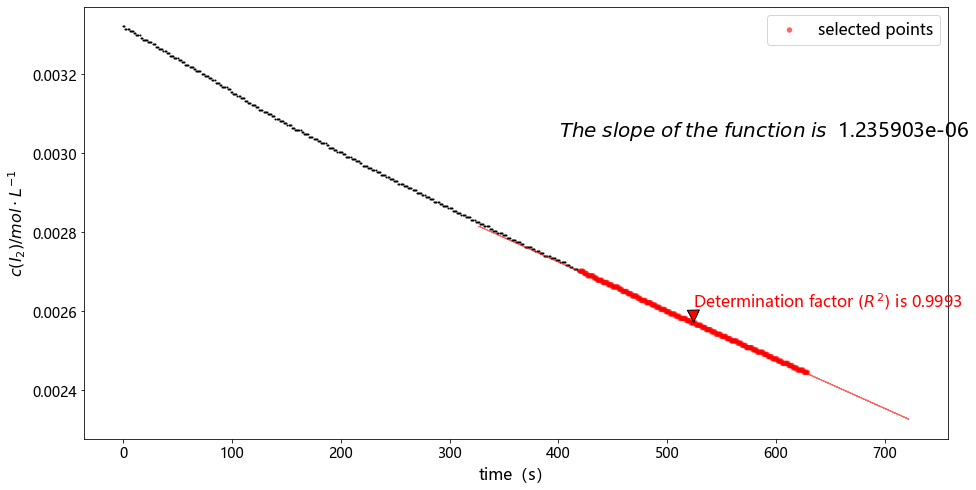

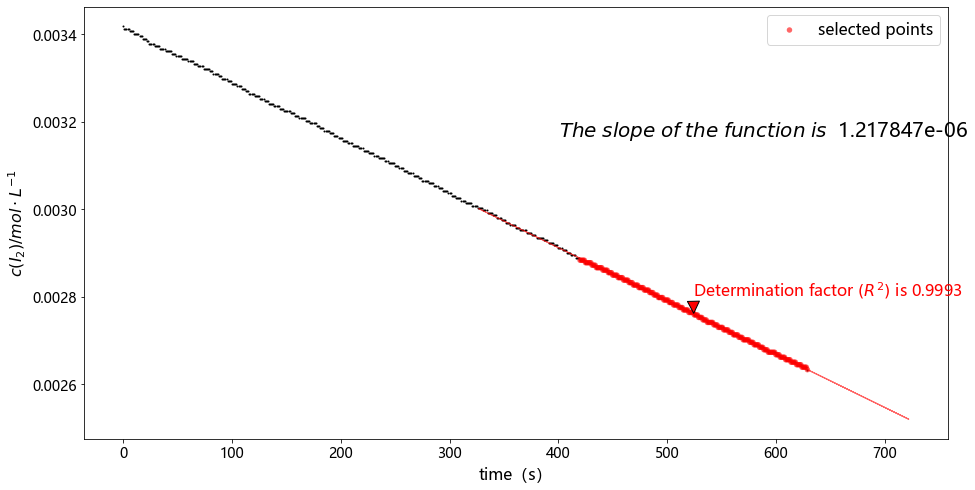

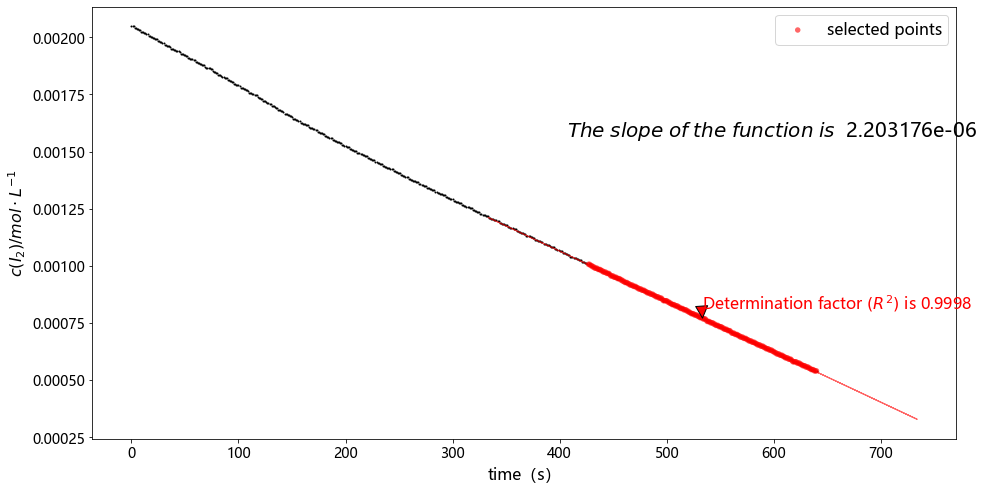

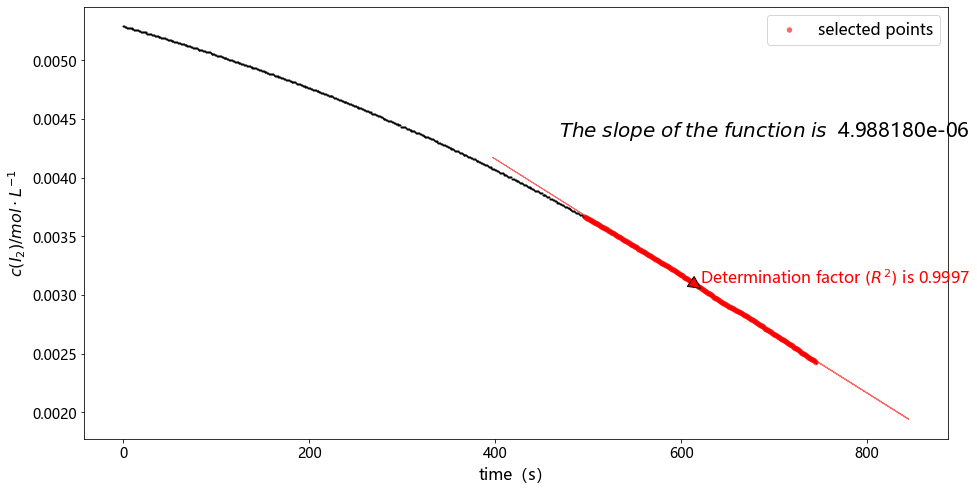

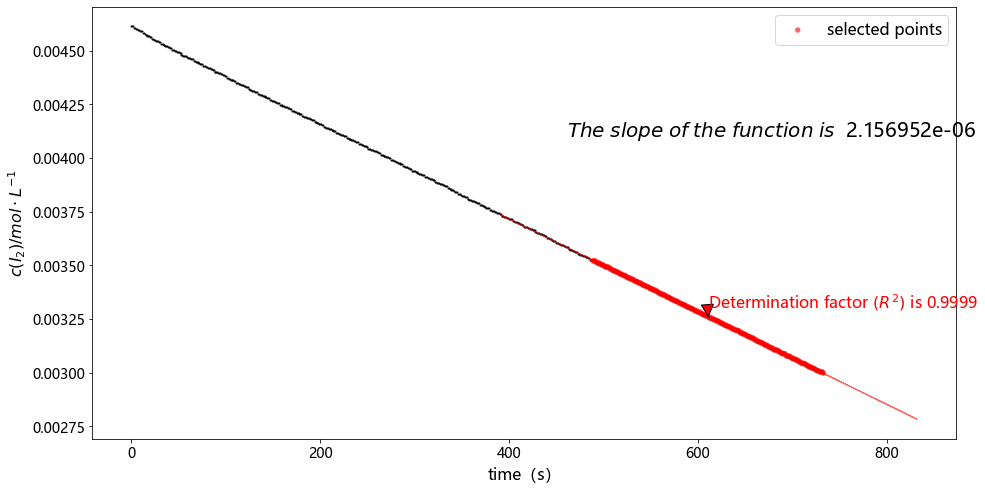

In [6]:
for file in files:
    name = file.replace('.xlsx', '')
    points = loaddata(file)
    #print(points)
    Ts = points.T[0]; As = points.T[1]
    cs = As / 175.826
    k = plot(Ts, cs, name = name)
    